In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

zillow = pd.read_csv('data/zillow_201808.csv')

In [3]:
zillow.columns

Index(['RegionID', 'RegionName', 'State', 'SizeRank',
       'price_to_rent_avg_201609_201708', 'price_to_rent_3yravg_2014_2017',
       'value_yoy_gr_2016_2018', 'rent_yoy_gr_2015_2017',
       'rent_3yravg_yoy_gr_2013_2017', 'sale_count_yoy_gr_2015_2017',
       'sale_count_3yravg_yoy_gr_2013_2017', 'turnover_yoy_gr_2015_2017',
       'turnover_3yravg_yoy_gr_2013_2017', 'pct_reduced_yoy_gr_2015_2017',
       'pct_reduced_3yravg_yoy_gr_2013_2017', 'sale_price_yoy_gr_2015_2017',
       'sale_price_3yravg_yoy_gr_2013_2017', 'ptrg_1yr_201609_201708',
       'ptrg_3yr_2013_2017'],
      dtype='object')

In [4]:
zillow.corr().value_yoy_gr_2016_2018.sort_values()

pct_reduced_3yravg_yoy_gr_2013_2017   -0.343028
pct_reduced_yoy_gr_2015_2017          -0.105820
ptrg_1yr_201609_201708                -0.052624
SizeRank                              -0.049615
RegionID                              -0.025382
price_to_rent_3yravg_2014_2017        -0.023815
ptrg_3yr_2013_2017                    -0.009660
sale_count_3yravg_yoy_gr_2013_2017     0.015202
price_to_rent_avg_201609_201708        0.016458
sale_count_yoy_gr_2015_2017            0.044811
turnover_3yravg_yoy_gr_2013_2017       0.063285
turnover_yoy_gr_2015_2017              0.067206
RegionName                             0.078757
rent_3yravg_yoy_gr_2013_2017           0.302601
rent_yoy_gr_2015_2017                  0.372369
sale_price_yoy_gr_2015_2017            0.510070
sale_price_3yravg_yoy_gr_2013_2017     0.555317
value_yoy_gr_2016_2018                 1.000000
Name: value_yoy_gr_2016_2018, dtype: float64

In [5]:
feature_cols = zillow.columns.drop(['value_yoy_gr_2016_2018', 'RegionID', 'RegionName', 'State', 'SizeRank'])

X = zillow[feature_cols]

y = zillow.value_yoy_gr_2016_2018

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 99)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1019, 14)
(255, 14)
(1019,)
(255,)


C:\Users\clinton\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [8]:
lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
lr.score(X_train, y_train)

0.4431689731764007

In [10]:
lr.score(X_test, y_test)

0.415931932472383

In [11]:
print(lr.intercept_)
list(zip(feature_cols, lr.coef_))

0.052035508694155186


[('price_to_rent_avg_201609_201708', 0.03167644589865284),
 ('price_to_rent_3yravg_2014_2017', -0.03428428396748375),
 ('rent_yoy_gr_2015_2017', 0.3134138152080055),
 ('rent_3yravg_yoy_gr_2013_2017', 0.13967077351946958),
 ('sale_count_yoy_gr_2015_2017', 0.017867767700412082),
 ('sale_count_3yravg_yoy_gr_2013_2017', -0.14553522310556719),
 ('turnover_yoy_gr_2015_2017', 0.012261335428806076),
 ('turnover_3yravg_yoy_gr_2013_2017', 0.16643418013552655),
 ('pct_reduced_yoy_gr_2015_2017', -0.029131169972879963),
 ('pct_reduced_3yravg_yoy_gr_2013_2017', -0.02804256274358757),
 ('sale_price_yoy_gr_2015_2017', 0.1092977149936681),
 ('sale_price_3yravg_yoy_gr_2013_2017', 0.20562742219684427),
 ('ptrg_1yr_201609_201708', -4.850301138325924e-05),
 ('ptrg_3yr_2013_2017', 1.2496001786964848e-06)]

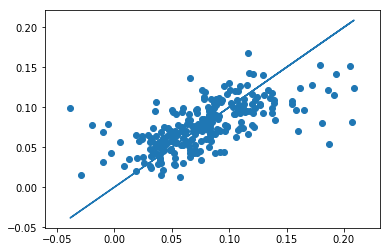

In [12]:
y_pred = lr.predict(X_test)
plt.scatter(y_test, y_pred);
plt.plot(y_test, y_test);

In [13]:
from sklearn import metrics

print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.032278027146408386


In [14]:
# Null RMSE is the RMSE that could be achieved by always predicting the mean response value. It is a benchmark to measure
# the model.

# Create a NumPy array with the same shape as y_test.
y_null = np.zeros_like(y_test, dtype=float)

# Fill the array with the mean value of y_test.
y_null.fill(y_test.mean())
y_null

array([0.07836978, 0.07836978, 0.07836978, 0.07836978, 0.07836978,
       0.07836978, 0.07836978, 0.07836978, 0.07836978, 0.07836978,
       0.07836978, 0.07836978, 0.07836978, 0.07836978, 0.07836978,
       0.07836978, 0.07836978, 0.07836978, 0.07836978, 0.07836978,
       0.07836978, 0.07836978, 0.07836978, 0.07836978, 0.07836978,
       0.07836978, 0.07836978, 0.07836978, 0.07836978, 0.07836978,
       0.07836978, 0.07836978, 0.07836978, 0.07836978, 0.07836978,
       0.07836978, 0.07836978, 0.07836978, 0.07836978, 0.07836978,
       0.07836978, 0.07836978, 0.07836978, 0.07836978, 0.07836978,
       0.07836978, 0.07836978, 0.07836978, 0.07836978, 0.07836978,
       0.07836978, 0.07836978, 0.07836978, 0.07836978, 0.07836978,
       0.07836978, 0.07836978, 0.07836978, 0.07836978, 0.07836978,
       0.07836978, 0.07836978, 0.07836978, 0.07836978, 0.07836978,
       0.07836978, 0.07836978, 0.07836978, 0.07836978, 0.07836978,
       0.07836978, 0.07836978, 0.07836978, 0.07836978, 0.07836

In [15]:
np.sqrt(metrics.mean_squared_error(y_test, y_null))

0.042235267683440235

In [16]:
from sklearn.feature_selection import RFE
#rank all features, i.e continue the elimination until the last one
rfe = RFE(lr, n_features_to_select=1)
rfe.fit(X,y)
 
print ("Features sorted by their rank:")
print (sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), feature_cols)))

Features sorted by their rank:
[(1, 'sale_price_3yravg_yoy_gr_2013_2017'), (2, 'rent_yoy_gr_2015_2017'), (3, 'turnover_3yravg_yoy_gr_2013_2017'), (4, 'sale_count_3yravg_yoy_gr_2013_2017'), (5, 'sale_price_yoy_gr_2015_2017'), (6, 'rent_3yravg_yoy_gr_2013_2017'), (7, 'pct_reduced_yoy_gr_2015_2017'), (8, 'price_to_rent_3yravg_2014_2017'), (9, 'price_to_rent_avg_201609_201708'), (10, 'pct_reduced_3yravg_yoy_gr_2013_2017'), (11, 'turnover_yoy_gr_2015_2017'), (12, 'sale_count_yoy_gr_2015_2017'), (13, 'ptrg_1yr_201609_201708'), (14, 'ptrg_3yr_2013_2017')]


In [17]:
# Define a function that accepts a list of features and returns testing RMSE.
def train_test_rmse(zillow, feature_cols):
    X = zillow[feature_cols]
    y = zillow.value_yoy_gr_2016_2018
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=99)
    
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [19]:
# Compare different sets of features.
print('All 14')
print(train_test_rmse(zillow, feature_cols))
print('Corr > |.2|')
print(train_test_rmse(zillow, ['pct_reduced_3yravg_yoy_gr_2013_2017', 'rent_3yravg_yoy_gr_2013_2017', 'rent_yoy_gr_2015_2017', 'sale_price_yoy_gr_2015_2017', 'sale_price_3yravg_yoy_gr_2013_2017']))
print('Top 4 coef')
print(train_test_rmse(zillow, ['turnover_3yravg_yoy_gr_2013_2017', 'sale_price_3yravg_yoy_gr_2013_2017', 'sale_count_3yravg_yoy_gr_2013_2017', 'rent_3yravg_yoy_gr_2013_2017']))
print('Top 7 from RFE')
print(train_test_rmse(zillow,['sale_price_3yravg_yoy_gr_2013_2017', 'sale_price_yoy_gr_2015_2017', 'rent_3yravg_yoy_gr_2013_2017', 'pct_reduced_3yravg_yoy_gr_2013_2017', 'turnover_3yravg_yoy_gr_2013_2017', 'sale_count_3yravg_yoy_gr_2013_2017', 'rent_yoy_gr_2015_2017']))
print('Top 5 from RFE')
print(train_test_rmse(zillow,['sale_price_3yravg_yoy_gr_2013_2017', 'sale_price_yoy_gr_2015_2017', 'rent_3yravg_yoy_gr_2013_2017', 'pct_reduced_3yravg_yoy_gr_2013_2017', 'turnover_3yravg_yoy_gr_2013_2017']))
print('Top 3 from RFE')
print(train_test_rmse(zillow,['sale_price_3yravg_yoy_gr_2013_2017', 'sale_price_yoy_gr_2015_2017', 'rent_3yravg_yoy_gr_2013_2017']))
print('--------------------')
print('Null RMSE - Always predicting the mean response value')
print(np.sqrt(metrics.mean_squared_error(y_test, y_null)))

All 14
0.032278027146408386
Corr > |.2|
0.033181597428914016
Top 4 coef
0.03458259696940861
Top 7 from RFE
0.033085336495120195
Top 5 from RFE
0.03297242947580091
Top 3 from RFE
0.03394522405066716
--------------------
Null RMSE - Always predicting the mean response value
0.042235267683440235


C:\Users\clinton\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
